# Part iii. Connecting and Importing

In [1]:
import sqlite3
import pandas as pd
from pandasql import sqldf

In [2]:
con= sqlite3.connect(r'C:\Users\amytu\OneDrive\Documents\SQL\SQLChallenges')

In [3]:
salary = pd.read_sql_query("SELECT timestamp \
,age \
,employer_industry_standardized \
,functional_area_job \
,job_title \
,salary \
,additional_compensation \
,currency \
,country \
,state \
,city \
,remote_or_onsite \
,yrs_experience \
,yrs_in_field \
,education \
,gender \
,race \
FROM Salary_Survey", con)
con.close()

In [4]:
salary

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
0,4/5/2022 11:37,45-54,"Accounting, Banking & Finance",Computing or Tech,Senior Integration Manager,"56,500","4,000",USD,United States,Iowa,Des Moines,Fully remote,11-20 years,5-7 years,College degree,Woman,White
1,4/5/2022 13:09,25-34,Education (Higher Education),Academia (research),Postdoc (research fellow),"35,500",0,GBP,Great Britain,,Edinburgh,Fully remote,8-10 years,5-7 years,PhD,Woman,White
2,4/5/2022 11:38,35-44,Education (Higher Education),Science,Quality Associate,"85,000",,USD,United States,North Carolina,Durham,On-site,11-20 years,11-20 years,College degree,Woman,White
3,4/5/2022 12:07,45-54,Media & Digital,Computing or Tech,Senior Data Engineer,"114,000",,USD,United States,Massachusetts,Boston,Fully remote,21-30 years,21-30 years,College degree,Man,White
4,4/5/2022 15:42,35-44,Media & Digital,Science,editor,"41,000",0,GBP,Great Britain,,Oxford,Hybrid,11-20 years,2-4 years,PhD,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15274,4/6/2022 14:31,25-34,,Publishing,Production controller,,,,,,,,,,,,
15275,4/13/2022 6:10,25-34,,Education (Primary/Secondary),Lead Manager and Primary Teacher,,,,,,,,,,,,
15276,4/27/2022 3:30,25-34,,Computing or Tech,Email Marketing Manager,,,,,,,,,,,,
15277,5/16/2022 17:20,45-54,,Engineering or Manufacturing,Project management,,,,,,,,,,,,


# Part iv. Analysis

## 1. Quality checks and cleaning

In [5]:
#looking at unique values
salary.nunique()

timestamp                         3961
age                                  7
employer_industry_standardized      38
functional_area_job                976
job_title                         9155
salary                            3102
additional_compensation            826
currency                            12
country                            108
state                              106
city                              3280
remote_or_onsite                     6
yrs_experience                       9
yrs_in_field                         9
education                            7
gender                               5
race                                41
dtype: int64

In [6]:
#just curious what the values were since studies have shown that gender heavily influences salaries
print(salary.gender.unique())

['Woman' 'Man' 'Non-binary' '' 'Other or prefer not to answer']


In [7]:
#looking at data types - may need to change data types for some columns for analysis later since all are objects
salary.dtypes

timestamp                         object
age                               object
employer_industry_standardized    object
functional_area_job               object
job_title                         object
salary                            object
additional_compensation           object
currency                          object
country                           object
state                             object
city                              object
remote_or_onsite                  object
yrs_experience                    object
yrs_in_field                      object
education                         object
gender                            object
race                              object
dtype: object

In [8]:
#finding nulls - none, which is strange because I can see empty rows
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15279 entries, 0 to 15278
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   timestamp                       15279 non-null  object
 1   age                             15279 non-null  object
 2   employer_industry_standardized  15279 non-null  object
 3   functional_area_job             15279 non-null  object
 4   job_title                       15279 non-null  object
 5   salary                          15279 non-null  object
 6   additional_compensation         15279 non-null  object
 7   currency                        15279 non-null  object
 8   country                         15279 non-null  object
 9   state                           15279 non-null  object
 10  city                            15279 non-null  object
 11  remote_or_onsite                15279 non-null  object
 12  yrs_experience                  15279 non-null

In [9]:
#looking to find index where empty rows begin (15181)
salary.tail(100)

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
15179,4/5/2022 12:18,55-64,"Leisure, Sport & Tourism",Animal management,Zoo curator,"85,000",0,USD,United States,Missouri,St. Louis,On-site,31-40 years,31-40 years,College degree,Woman,White
15180,4/5/2022 14:54,35-44,Business or Consulting,Bookkeeping & Admin mostly in Construction,Bookkeeper,"60,640",0,USD,United States,Texas,Austin,Other/it's complicated,11-20 years,5-7 years,College degree,Woman,White
15181,4/5/2022 11:06,25-34,,"Marketing, Advertising & PR",Partner relationship and marketing manager,,,,,,,,,,,,
15182,4/5/2022 11:08,25-34,,Computing or Tech,Cyber security,,,,,,,,,,,,
15183,4/5/2022 11:17,35-44,,Architect,Architect,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15274,4/6/2022 14:31,25-34,,Publishing,Production controller,,,,,,,,,,,,
15275,4/13/2022 6:10,25-34,,Education (Primary/Secondary),Lead Manager and Primary Teacher,,,,,,,,,,,,
15276,4/27/2022 3:30,25-34,,Computing or Tech,Email Marketing Manager,,,,,,,,,,,,
15277,5/16/2022 17:20,45-54,,Engineering or Manufacturing,Project management,,,,,,,,,,,,


In [10]:
"""
Dropping unusable rows from the end of dataframe. Indices 15181 - 15278, nearly 100 rows, contained no salary data.
This could potentially skew analysis results. Checking tail to ensure accurate rows dropped, and checking timestamp format.
"""
salary1 = salary.drop(labels=range(15181, 15279), axis=0)
salary1.tail()

,timestamp,age,employer_industry_standardized,functional_area_job,job_title,salary,additional_compensation,currency,country,state,city,remote_or_onsite,yrs_experience,yrs_in_field,education,gender,race
15176,1/14/2023 2:37,35-44,Sales,Computing or Tech,Material Master Analyst,57000,0,USD,United States,Massachusetts,North of Boston,Fully remote,21-30 years,11-20 years,College degree,Woman,White
15177,4/5/2022 11:21,35-44,Recruitment or HR,Training/Learning and Development,Training Coordinator,"45,000","6,500",USD,United States,Oklahoma,Mcalester,Hybrid,11-20 years,2-4 years,High School,Woman,White
15178,4/5/2022 13:40,25-34,Recruitment or HR,Workforce Development,Instructional Specialist,"53,000",0,USD,United States,Michigan,Detroit,Hybrid,8-10 years,8-10 years,Master's degree,Man,White
15179,4/5/2022 12:18,55-64,"Leisure, Sport & Tourism",Animal management,Zoo curator,"85,000",0,USD,United States,Missouri,St. Louis,On-site,31-40 years,31-40 years,College degree,Woman,White
15180,4/5/2022 14:54,35-44,Business or Consulting,Bookkeeping & Admin mostly in Construction,Bookkeeper,"60,640",0,USD,United States,Texas,Austin,Other/it's complicated,11-20 years,5-7 years,College degree,Woman,White


In [11]:
#Determining numbers and columns of cleaner dataframe
salary1.shape

(15181, 17)

## 2. Find the total number of survey participants, maximum, and minimum salary including additional compensation by employer industry.  Sort the data by participants and maximum compensation. Export the results to a csv.

In [12]:
#Find the total number of survey participants - using orginial dataframe that includes all participants
len(salary)

15279

In [13]:
'''
maximum, and minimum salary including additional compensation by employer industry. 
Sort the data by participants and maximum compensation. I'm using the dataframe that includes complete information.
I also included currency even though we weren't asked because the differing exchange rates could have a major impact on
what all of this data actually means.
'''
salary_max_min = sqldf('SELECT employer_industry_standardized \
,(salary + additional_compensation) as total_compensation \
,currency \
FROM salary1 \
ORDER BY total_compensation DESC')
salary_max_min

,employer_industry_standardized,total_compensation,currency
0,Transport or Logistics,86000000,Other
1,"Marketing, Advertising & PR",6000000,JPY
2,Education (Primary/Secondary),2800000,JPY
3,Law,2500000,USD
4,"Accounting, Banking & Finance",1300000,USD
...,...,...,...
15176,Education (Higher Education),1,USD
15177,Education (Higher Education),1,USD
15178,Education (Higher Education),1,USD
15179,Law,1,USD


In [14]:
#max compensation - this is in an unknown currency
salary_max_min.total_compensation.max()

86000000

In [15]:
#min compensation
salary_max_min.total_compensation.min()

1

In [16]:
#Export the results to a csv.
salary_max_min.to_csv(r'C:\Users\amytu\OneDrive\Documents\Python\salary_max_min.csv')

## 3. Find the total number of survey participants by employer industry, country, education, gender, race. Export the results to csv.

In [114]:
#Using dataframe with complete info as dropped rows do not include data on country, education, gender or race.
industry = pd.DataFrame(sqldf('SELECT \
 DISTINCT employer_industry_standardized as Industry \
,COUNT(employer_industry_standardized) as Participants_Ind \
FROM salary1 \
GROUP BY employer_industry_standardized \
ORDER BY Participants_Ind DESC'))
industry

,Industry,Participants_Ind
0,Education (Higher Education),1987
1,Computing or Tech,1836
2,Nonprofits,1540
3,Government & Public Administration,1423
4,Health care,1196
5,Engineering or Manufacturing,1014
6,"Accounting, Banking & Finance",882
7,Education (Primary/Secondary),549
8,Law,504
9,Media & Digital,456


In [72]:
industry.Participants_Ind.sum()

15181

In [116]:
#I don't know why some of these countries are appearing multiple times even with the DISTINCT in the SELECT statement.
#Not dropping duplicates since that would impact the counts.
country = pd.DataFrame(sqldf('SELECT \
DISTINCT country as Country \
,COUNT(country) as Participants_ctry \
FROM salary1 \
GROUP BY country \
ORDER BY Participants_ctry DESC'))
country

,Country,Participants_ctry
0,United States,12779
1,Canada,925
2,Great Britain,718
3,Australia,219
4,Germany,90
...,...,...
102,Austria,1
103,"Australia, Canada",1
104,Argentina,1
105,Argentina,1


In [76]:
country.Participants_ctry.sum()

15181

In [117]:
education = pd.DataFrame(sqldf('SELECT \
 DISTINCT education as Education \
,COUNT(education) as Participants_ed \
FROM salary1 \
GROUP BY education \
ORDER BY Participants_ed DESC'))
education

,Education,Participants_ed
0,College degree,6898
1,Master's degree,5250
2,Some college,937
3,PhD,896
4,"Professional degree (MD, JD, etc.)",778
5,High School,255
6,,167


In [79]:
education.Participants_ed.sum()

15181

In [118]:
gender = pd.DataFrame(sqldf('SELECT \
 DISTINCT gender as Gender \
,COUNT(gender) as Participants_gen \
FROM salary1 \
GROUP BY gender \
ORDER BY Participants_gen DESC'))
gender

,Gender,Participants_gen
0,Woman,11998
1,Man,2161
2,Non-binary,540
3,,349
4,Other or prefer not to answer,133


In [81]:
gender.Participants_gen.sum()

15181

In [120]:
race = pd.DataFrame(sqldf('SELECT \
 DISTINCT race as Race \
,COUNT(race) as Participants_race \
FROM salary1 \
GROUP BY race \
ORDER BY Participants_race DESC'))
race

,Race,Participants_race
0,White,13131
1,Asian or Asian American,542
2,"Hispanic, Latino, or Spanish origin",277
3,Another option not listed here or prefer not t...,256
4,Black or African American,234
5,"Asian or Asian American, White",208
6,"Hispanic, Latino, or Spanish origin, White",171
7,,65
8,"Black or African American, White",57
9,"Native American or Alaska Native, White",42


In [84]:
race.Participants_race.sum()

15181

In [121]:
Participant_Counts = country.join([industry, education, gender, race])
Participant_Counts

,Country,Participants_ctry,Industry,Participants_Ind,Education,Participants_ed,Gender,Participants_gen,Race,Participants_race
0,United States,12779,Education (Higher Education),1987.0,College degree,6898.0,Woman,11998.0,White,13131.0
1,Canada,925,Computing or Tech,1836.0,Master's degree,5250.0,Man,2161.0,Asian or Asian American,542.0
2,Great Britain,718,Nonprofits,1540.0,Some college,937.0,Non-binary,540.0,"Hispanic, Latino, or Spanish origin",277.0
3,Australia,219,Government & Public Administration,1423.0,PhD,896.0,,349.0,Another option not listed here or prefer not t...,256.0
4,Germany,90,Health care,1196.0,"Professional degree (MD, JD, etc.)",778.0,Other or prefer not to answer,133.0,Black or African American,234.0
...,...,...,...,...,...,...,...,...,...,...
102,Austria,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,"Australia, Canada",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Argentina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Argentina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
Participant_Counts.to_csv(r"C:\Users\amytu\OneDrive\Documents\Python\Participant_Counts.csv")

In [104]:
#Just rechecking this code that initially tried to see if I had made a prior mistake, but it still isn't giving 
#me the info the way I want to see it, even with different GROUP BYs.
df = sqldf('SELECT employer_industry_standardized as Industry \
,COUNT(employer_industry_standardized) as Count_Ind \
,country as Country \
,COUNT(country) as Count_Co \
,education as Education \
,COUNT(education) as Count_Ed \
,gender as Gender \
,COUNT(gender) as Count_Gen \
,race as Race \
,COUNT(race) as Count_Race \
FROM salary1 \
GROUP BY employer_industry_standardized')
df

,Industry,Count_Ind,Country,Count_Co,Education,Count_Ed,Gender,Count_Gen,Race,Count_Race
0,"Accounting, Banking & Finance",882,United States,882,College degree,882,Woman,882,White,882
1,Agriculture or Forestry,85,United States,85,PhD,85,Woman,85,White,85
2,Art & Design,112,United States,112,Master's degree,112,Woman,112,White,112
3,Business or Consulting,433,United States,433,Some college,433,Woman,433,White,433
4,Co,1,United States,1,Master's degree,1,Woman,1,White,1
5,Computing or Tech,1836,Canada,1836,Some college,1836,Man,1836,Asian or Asian American,1836
6,Education (Higher Education),1987,Great Britain,1987,PhD,1987,Woman,1987,White,1987
7,Education (Primary/Secondary),549,United States,549,College degree,549,Woman,549,White,549
8,Engineering or Manufacturing,1014,United States,1014,College degree,1014,Man,1014,White,1014
9,Entertainment,171,United States,171,College degree,171,Man,171,White,171


## 4.	Create at least 1 chart from questions 2 and 3. You can choose whatever you want to visualize. Make sure to use labels.  

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of Participants')

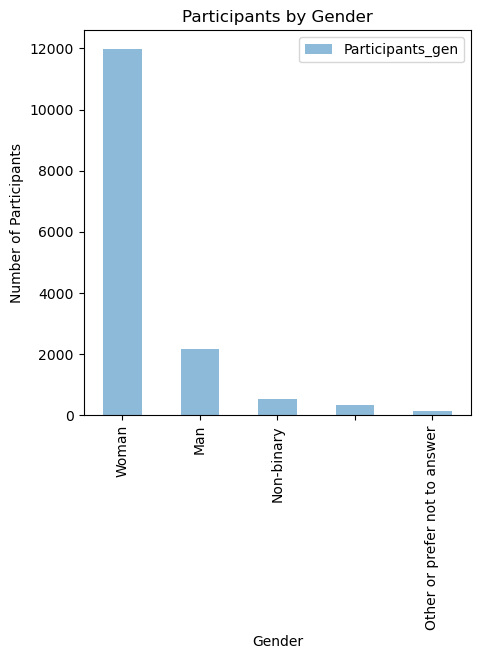

In [143]:
Gender=gender.plot(x='Gender',y=['Participants_gen'],kind='bar',alpha=0.5,title='Participants by Gender',figsize=(5, 5))
Gender.set_ylabel('Number of Participants')


In [152]:
Average_Salaries = sqldf('SELECT employer_industry_standardized as Industry \
,AVG(Total_Compensation) as Average_Compensation \
FROM salary_max_min \
GROUP BY Industry \
ORDER BY Average_Compensation DESC')
Average_Salaries

,Industry,Average_Compensation
0,Transport or Logistics,489651.270718
1,"Marketing, Advertising & PR",36674.822157
2,Publishing,35717.333333
3,Science,24369.213777
4,Computing or Tech,23448.208061
5,"Accounting, Banking & Finance",22072.197279
6,Food and Beverage,21488.290323
7,Utilities & Telecommunications,21117.343750
8,Law,20133.827381
9,Recruitment or HR,18288.271028


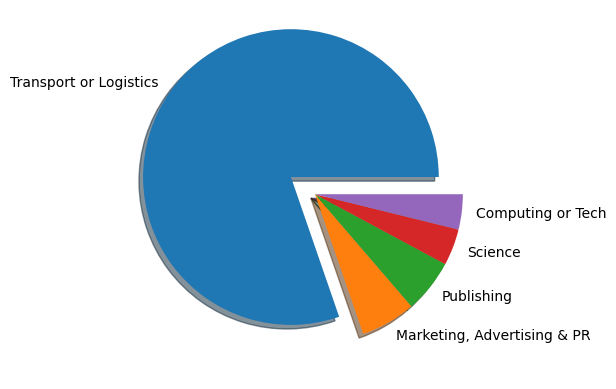

In [164]:
#Again not super accurate as that Transport or Logistics category includes a huge outlier and currencies are mixed.

explode = (0.2,0,0,0, 0)
plt.pie(Average_Salaries.Average_Compensation.head(5), labels = Average_Salaries.Industry.head(5), shadow = True, explode = explode)
plt.show()

## 5.	a.	What is the best industry for women based on salary and additional compensation?



In [190]:
#According to the table below Transport and Logistics, but I don't trust that number, so I'd be more comfortable answering
#Marketing, Advertising, and PR. TO be sure I would need to convert all of the compensation to a standard currency, and 
#check to see if there was still a majot outlier in Transport or Logistics and follow-up to verufy that.

Women = sqldf('SELECT employer_industry_standardized as Industry \
,AVG(salary + additional_compensation) as Average_Compensation \
FROM salary1 \
WHERE gender = "Woman" \
GROUP BY Industry \
ORDER BY Average_Compensation DESC')
Women

,Industry,Average_Compensation
0,Transport or Logistics,656687.492537
1,"Marketing, Advertising & PR",42784.584229
2,Publishing,35717.333333
3,Utilities & Telecommunications,23333.516304
4,Science,22196.713018
5,Food and Beverage,21035.461538
6,Computing or Tech,20207.765677
7,"Accounting, Banking & Finance",19504.435171
8,Health Care,17616.285714
9,Social Work,17486.140351


## 5.b.	What is the best industry for non-college educated men based on salary and additional compensation?

In [191]:
#Highest average salary for this population is in Marketing, Advertising & PR. Left out the null education data since we
#can't be sure of their level of education.
Men = sqldf('SELECT employer_industry_standardized as Industry \
,AVG(salary + additional_compensation) as Average_Compensation \
FROM salary1 \
WHERE gender = "Man" AND education = "High School" \
GROUP BY Industry \
ORDER BY Average_Compensation DESC')
Men

,Industry,Average_Compensation
0,"Marketing, Advertising & PR",135000.000000
1,Government & Public Administration,98794.666667
2,Hospitality & Events,28361.666667
3,Education (Primary/Secondary),24601.500000
4,Property or Construction,20065.000000
5,Retail,16582.400000
6,Business or Consulting,14277.500000
7,"Accounting, Banking & Finance",8793.600000
8,Computing or Tech,3798.166667
9,Health care,258.750000
